In [1]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
# Leer el archivo de texto
with open('chat.txt', 'r') as f:
    chat = f.read()
print(type(chat))
print(len(chat))
print(chat[:700])

<class 'str'>
342509
10/4/22, 08:35 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
10/4/22, 08:35 - You created group "Big Data & AI 🖥️🍻"
10/4/22, 08:37 - Ruben Tak joined using this group's invite link
10/4/22, 08:38 - You added Mamuka Barnabishvili
10/4/22, 08:40 - Mamuka Barnabishvili left
10/4/22, 08:41 - david: I don't know if everybody saw the email or the Onassis' message but today's class is gonna be at 3 pm
10/4/22, 08:42 - Mamuka Barnabishvili joined using this group's invite link
10/4/22, 08:42 - Ottavio Oludovisi: Great I just arrived
10/4/22, 08:43 - david: Great that you're going back to raval so you can 


In [3]:
# This new list (new_chat) is gonna store individual messages after every new line(\n)
new_chat = []
a = 0
b = 0

#The string variable is split at each carriage return and separates the messages into a list.
while chat.find('\n', a+1) != -1:
    a = chat.find('\n',b)
    b = chat.find('\n',a+1)
    new_chat.append(chat[a+1:b])

In [4]:
# new list that will not include the time and date
cleaned_chat = []
no_valid_data = 0
eliminados = []
sin_colon = []

for i in range(len(new_chat)):
    # Messages has at least 2 colons, that's why I'm filtering if there is only one and has a date with 2 '/'
      if (new_chat[i].count(':') == 1 and new_chat[i].count('/')==2) :
          no_valid_data = no_valid_data + 1
          sin_colon.append(new_chat[i])
      else:
          # Findind the positions of the colons, slash, and the hyphen
          first_colon = new_chat[i].find(':')
          second_colon = new_chat[i].find(':',first_colon+1)
          slash = new_chat[i].find('/')
          
          # 10/4/22, 08:42 - Ottavio Oludovisi: Great I just arrived
          comment = new_chat[i][second_colon+2:]
          
          # With the amount of slash we can know if there is a link in the message
          if (comment.count('/')<3):
              cleaned_chat.append(comment)
          else: 
              eliminados.append(comment)
              no_valid_data = no_valid_data + 1

# Show the results after cleaning data
print('Amount of rows that were deleted:', (no_valid_data))
print('Size of the file before be cleaned',len(new_chat))
print('Size of the file after be cleaned' ,len(cleaned_chat))

Amount of rows that were deleted: 230
Size of the file before be cleaned 5198
Size of the file after be cleaned 4968


In [5]:
cleaned_chat[:3]

["I don't know if everybody saw the email or the Onassis' message but today's class is gonna be at 3 pm",
 'Great I just arrived',
 "Great that you're going back to raval so you can sleep"]

In [6]:
chat_str = ' '.join(cleaned_chat)
print(type(chat_str))
print(len(chat_str))
print(chat_str[:700])

<class 'str'>
170274
I don't know if everybody saw the email or the Onassis' message but today's class is gonna be at 3 pm Great I just arrived Great that you're going back to raval so you can sleep Thanks, david Stay at home day <Media omitted> <Media omitted> <Media omitted> I’m too happy, this time I only just left my room Jajajaja Literally walked out the door 😂😂 <Media omitted> Thanks guys 👌🏽 <Media omitted> Thankfully I already took a course of python the last year 🙃 Right 😅😅😅 This message was deleted This message was deleted მოკლეე ჩემი ლეპტოპი სადღაც 12 სთ ძლებს დატენვის გარეშე 😬 მგონი ძაან კაია 12 hours Wow Good for you @34695128762 Haven't see your language before 😱 This message was deleted I Was not s


In [7]:
nlp = spacy.load("en_core_web_sm")
doc_1 = nlp(chat_str)
print('size:',len(doc_1))
print('type:',type(doc_1))
print(doc_1[:200])

size: 36984
type: <class 'spacy.tokens.doc.Doc'>
I don't know if everybody saw the email or the Onassis' message but today's class is gonna be at 3 pm Great I just arrived Great that you're going back to raval so you can sleep Thanks, david Stay at home day <Media omitted> <Media omitted> <Media omitted> I’m too happy, this time I only just left my room Jajajaja Literally walked out the door 😂😂 <Media omitted> Thanks guys 👌🏽 <Media omitted> Thankfully I already took a course of python the last year 🙃 Right 😅😅😅 This message was deleted This message was deleted მოკლეე ჩემი ლეპტოპი სადღაც 12 სთ ძლებს დატენვის გარეშე 😬 მგონი ძაან კაია 12 hours Wow Good for you @34695128762 Haven't see your language before 😱 This message was deleted I Was not sending this message here 😬 Neither have I, this is cool Actually david is my country-s very native name, დავითი will be in Georgian Exploratory Data Analysis Course:  tatistics Fundamentals: BTW is there techno event lovers in our group? I am


In [8]:
# Definir una lista de palabras para agregar al conjunto (set)
add_stop_words = ['medium', 'omit']

# Agregar las palabras de la lista al conjunto (set) usando el método update()
STOP_WORDS.update(add_stop_words)

In [9]:
filtrado = []

for token in doc_1:
    if (token.is_alpha) and not(token.lemma_.lower() in STOP_WORDS):
        filtrado.append(token.text.lower())

In [10]:
words_as_string = ' '.join(filtrado)

In [11]:
words_as_string

'know everybody email onassis message today class pm great arrived great raval sleep thanks david stay home day happy time left room jajajaja literally walked door thanks guys thankfully course python year right message deleted message deleted მოკლეე ჩემი ლეპტოპი სადღაც სთ ძლებს დატენვის გარეშე მგონი ძაან კაია hours wow good language message deleted sending message cool actually david country s native დავითი georgian exploratory data analysis course tatistics fundamentals btw techno event lovers group planning event end october wants join great brunch park sunday bunch people nice carbonara ahahahahahhaah man try bow knows login able log know course study amazon web services big data infrastructure big data security yeah maybe thought spam use login stuff mentioned lol aquí te va una playlist para ti bts party de add songs preference time create hey feeling good rn want spread germs spare tonight drink higher everest right wondering lol deleted message deleted message let know lol broo

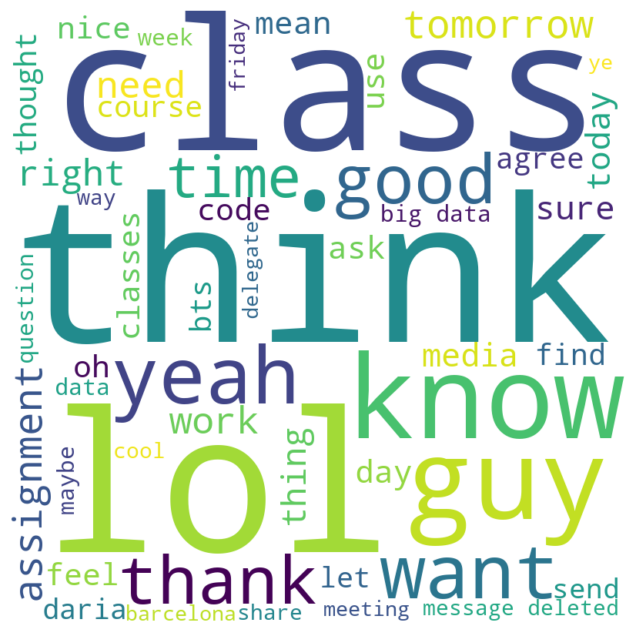

In [12]:
# Crear el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, max_words=50).generate(words_as_string)

# Visualizar el WordCloud generado
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
pip install pytagcloud

     -------------------------------------- 754.7/754.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759867 sha256=e8bde0c823b16ea02bd755e235c1aae558cadb549386604a6713cf416371ee6c
  Stored in directory: c:\users\ockda\appdata\local\pip\cache\wheels\74\9f\93\6322d7ac8b7c348b7d625f95919691d20cd46d2989dc61b165
Successfully built pytagcloud
Note: you may need to restart the kernel to use updated packages.
